#Connecting libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import plotly.express as px

#Loading dataset

In [2]:
!wget https://raw.githubusercontent.com/ivtipm/ML/main/datasets/Mall_Customers.csv
!ls -al

--2022-06-06 08:06:20--  https://raw.githubusercontent.com/ivtipm/ML/main/datasets/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2022-06-06 08:06:20 (52.8 MB/s) - ‘Mall_Customers.csv’ saved [4286/4286]

total 24
drwxr-xr-x 1 root root 4096 Jun  6 08:06 .
drwxr-xr-x 1 root root 4096 Jun  6 08:03 ..
drwxr-xr-x 4 root root 4096 Jun  1 13:49 .config
-rw-r--r-- 1 root root 4286 Jun  6 08:06 Mall_Customers.csv
drwxr-xr-x 1 root root 4096 Jun  1 13:50 sample_data


In [3]:
data_original = pd.read_csv('Mall_Customers.csv')
data = data_original.drop(columns = ['CustomerID'])
data.rename(columns = {'Annual Income (k$)': 'annual_income', 'Genre': 'gender', 'Spending Score (1-100)': 'spending_score', 'Age': 'age'}, inplace = True)

genders = data['gender']
data.drop(columns = ['gender'], inplace = True)
data['gender'] = genders

data

age  annual_income  spending_score  gender
0     19             15              39    Male
1     21             15              81    Male
2     20             16               6  Female
3     23             16              77  Female
4     31             17              40  Female
..   ...            ...             ...     ...
195   35            120              79  Female
196   45            126              28  Female
197   32            126              74    Male
198   32            137              18    Male
199   30            137              83    Male

[200 rows x 4 columns]

In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

age               0
annual_income     0
spending_score    0
gender            0
dtype: int64

# Non-numeric features encoding

In [6]:
label_encode_gender = LabelEncoder()
data['gender'] = label_encode_gender.fit_transform(data['gender'])

data

age  annual_income  spending_score  gender
0     19             15              39       1
1     21             15              81       1
2     20             16               6       0
3     23             16              77       0
4     31             17              40       0
..   ...            ...             ...     ...
195   35            120              79       0
196   45            126              28       0
197   32            126              74       1
198   32            137              18       1
199   30            137              83       1

[200 rows x 4 columns]

In [ ]:
data.describe()

age  annual_income  spending_score      gender
count  200.000000     200.000000      200.000000  200.000000
mean    38.850000      60.560000       50.200000    0.440000
std     13.969007      26.264721       25.823522    0.497633
min     18.000000      15.000000        1.000000    0.000000
25%     28.750000      41.500000       34.750000    0.000000
50%     36.000000      61.500000       50.000000    0.000000
75%     49.000000      78.000000       73.000000    1.000000
max     70.000000     137.000000       99.000000    1.000000

#Data analysis

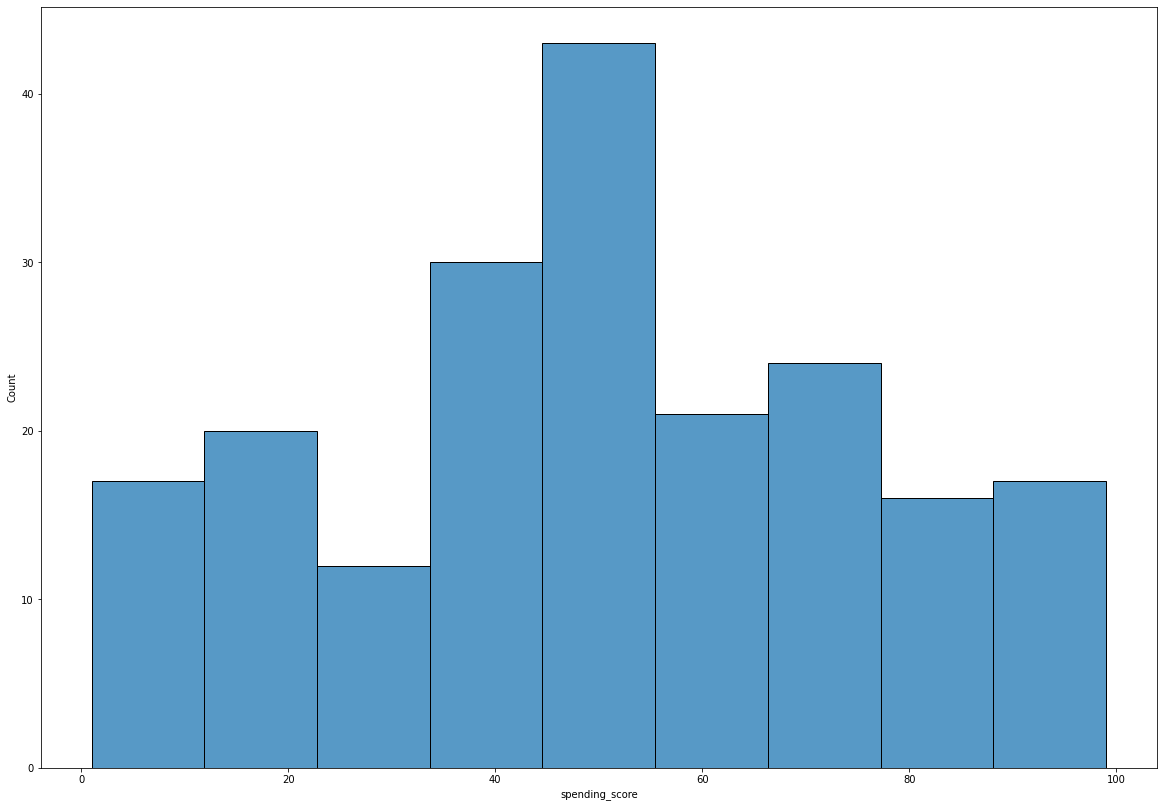

In [ ]:
plt.figure(figsize = (20, 14))
seaborn.histplot(data['spending_score'], label = 'Spending Score')

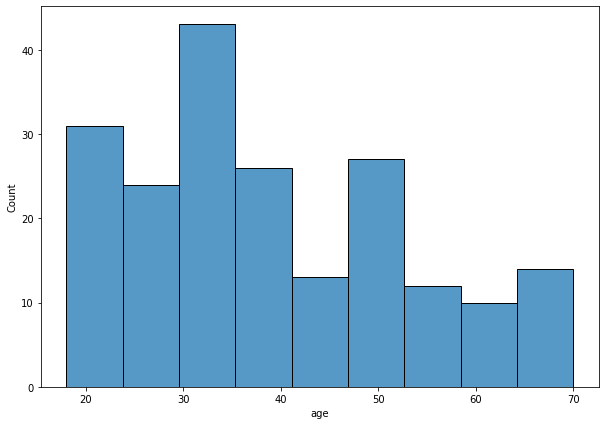

In [ ]:
plt.figure(figsize = (10, 7))
seaborn.histplot(data = data[['age', 'annual_income']], x = 'age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


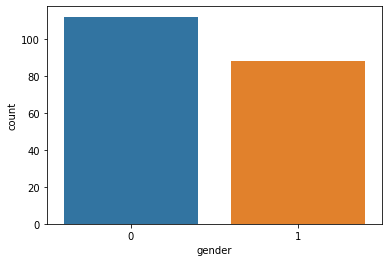

In [ ]:
seaborn.countplot(data['gender'], label = 'Count')

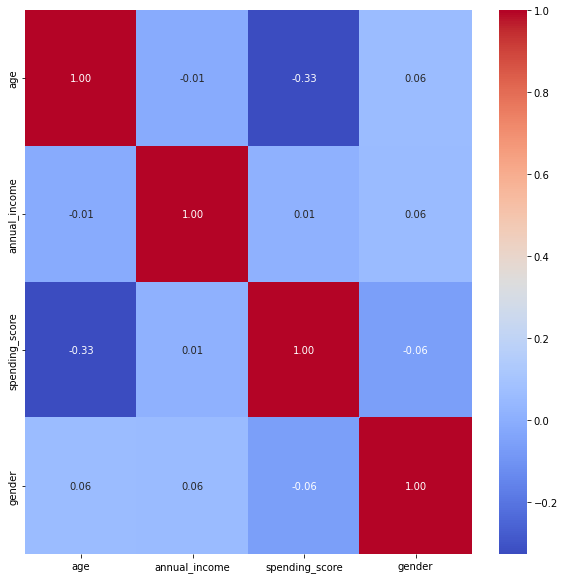

In [ ]:
plt.figure(figsize = (10, 10))
seaborn.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

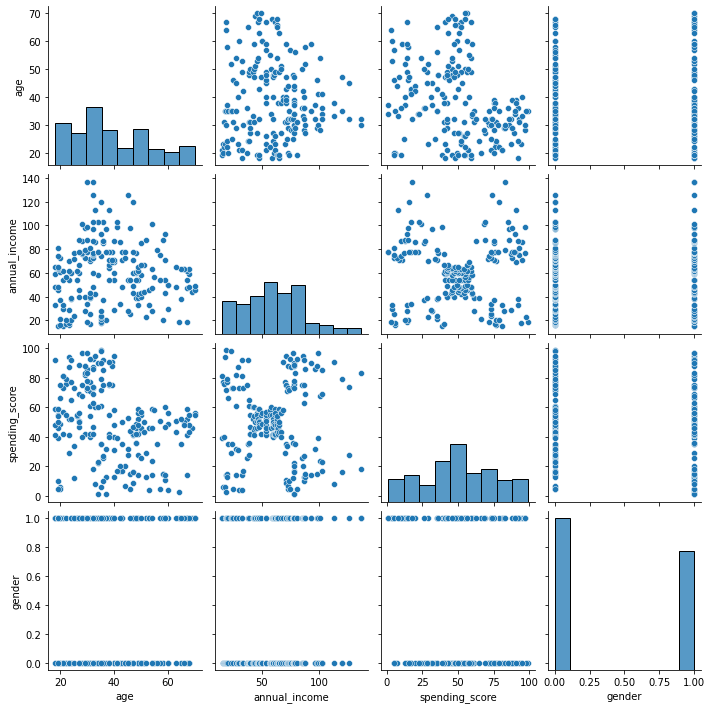

In [9]:
seaborn.pairplot(data)

#Data standardization

In [7]:
data_standardized = data.copy()

gender = data_standardized['gender']
data_standardized.drop(columns = ['gender'], inplace = True)

scaler = preprocessing.StandardScaler()
scaler.fit(data_standardized)
data_standardized_matrix = scaler.transform(data_standardized)

data_standardized = pd.DataFrame(data_standardized_matrix, columns = ['age', 'annual_income', 'spending_score'])
data_standardized['gender'] = gender
data_standardized

age  annual_income  spending_score  gender
0   -1.424569      -1.738999       -0.434801       1
1   -1.281035      -1.738999        1.195704       1
2   -1.352802      -1.700830       -1.715913       0
3   -1.137502      -1.700830        1.040418       0
4   -0.563369      -1.662660       -0.395980       0
..        ...            ...             ...     ...
195 -0.276302       2.268791        1.118061       0
196  0.441365       2.497807       -0.861839       0
197 -0.491602       2.497807        0.923953       1
198 -0.491602       2.917671       -1.250054       1
199 -0.635135       2.917671        1.273347       1

[200 rows x 4 columns]

In [8]:
data_standardized.describe()

age  annual_income  spending_score      gender
count  2.000000e+02   2.000000e+02    2.000000e+02  200.000000
mean  -9.603429e-17  -6.128431e-16   -1.121325e-16    0.440000
std    1.002509e+00   1.002509e+00    1.002509e+00    0.497633
min   -1.496335e+00  -1.738999e+00   -1.910021e+00    0.000000
25%   -7.248436e-01  -7.275093e-01   -5.997931e-01    0.000000
50%   -2.045351e-01   3.587926e-02   -7.764312e-03    0.000000
75%    7.284319e-01   6.656748e-01    8.851316e-01    1.000000
max    2.235532e+00   2.917671e+00    1.894492e+00    1.000000

#Principal component analysis (PCA)

Variance of every feature [0.4095285 0.3081674]
Variance of 2 features 0.718



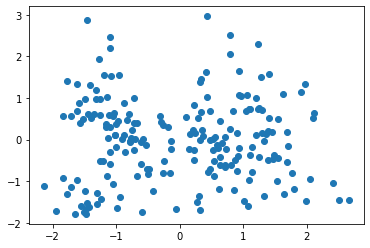

In [10]:
pca = PCA(n_components = 2)
X = pca.fit_transform(data_standardized.values)

print(f"Variance of every feature {pca.explained_variance_ratio_}")
print(f"Variance of 2 features {np.sum(pca.explained_variance_ratio_):.3f}")
print('')

plt.scatter(X[:, 0], X[:, 1])

In [13]:
pca3 = PCA(n_components = 3) 
X3 = pca3.fit_transform(data_standardized.values)

print(f"Variance for 3 features {np.sum(pca3.explained_variance_ratio_):.3f}")

fig = px.scatter_3d(x = X3[:, 0], y = X3[:, 1], z = X3[:, 2], width = 700)
fig.show()

Variance for 3 features 0.925


#Elbow rule

Amount of clusters: 2


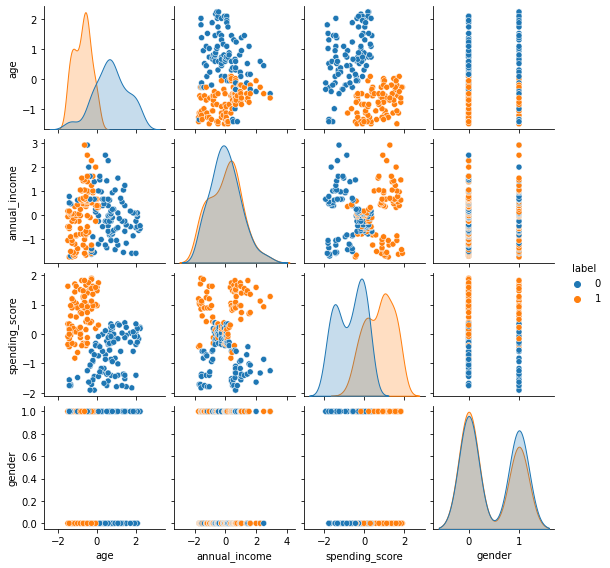


Amount of clusters: 3


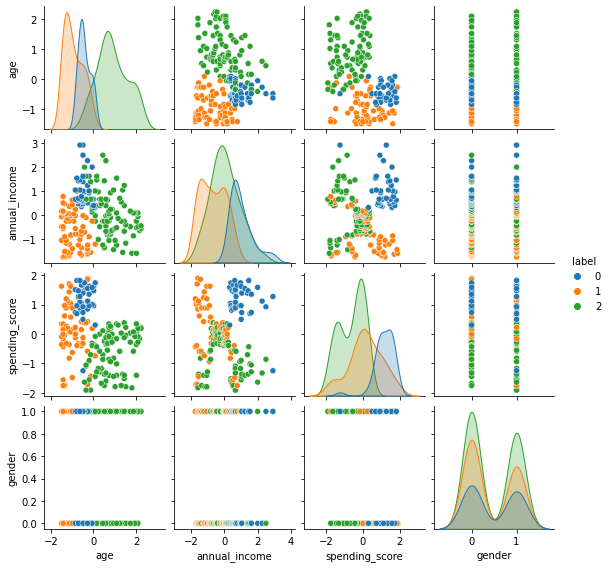


Amount of clusters: 4


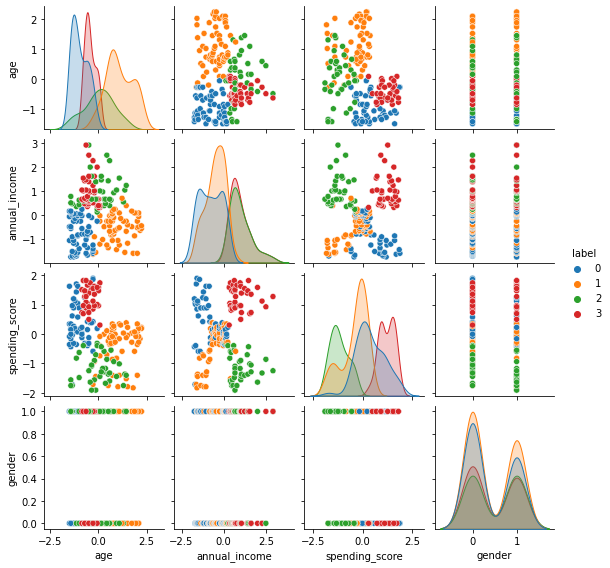


Amount of clusters: 5


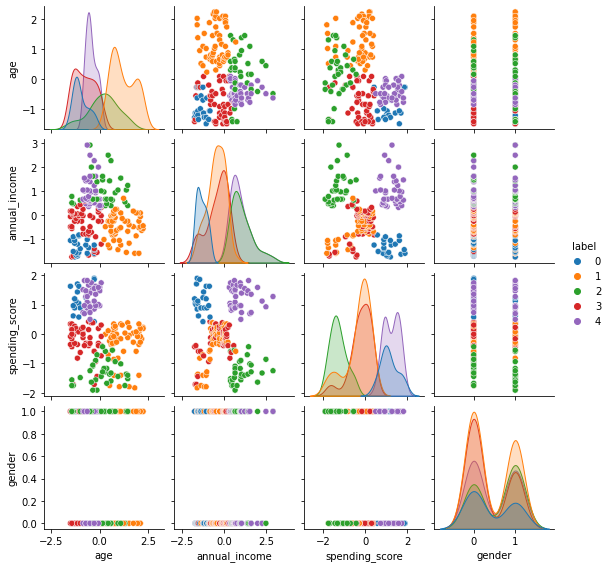


Amount of clusters: 6


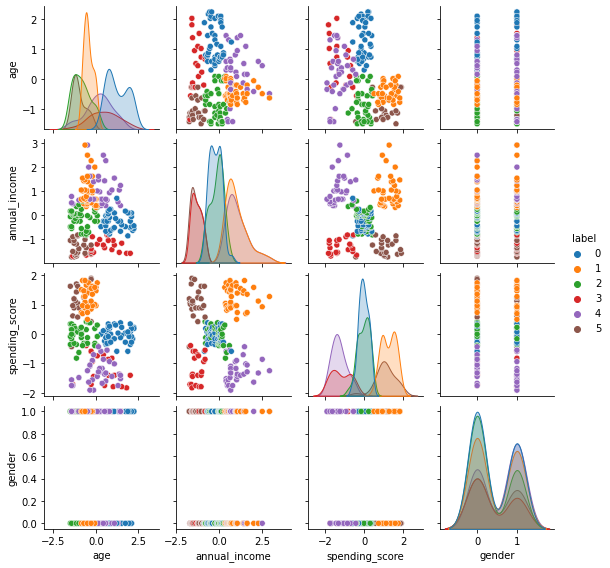


Amount of clusters: 7


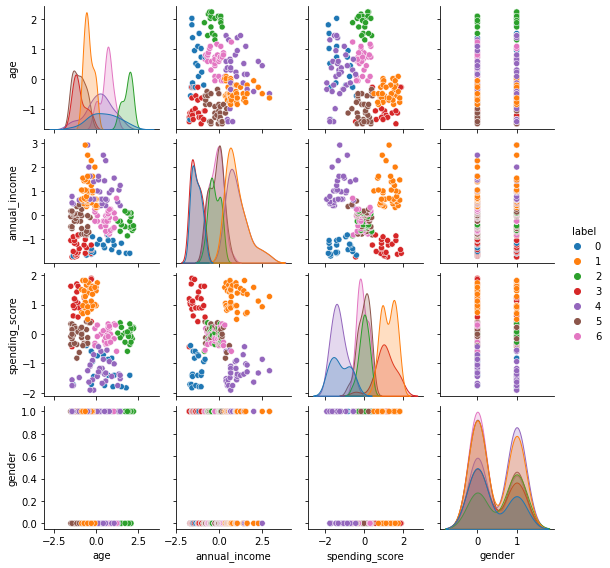


Amount of clusters: 8


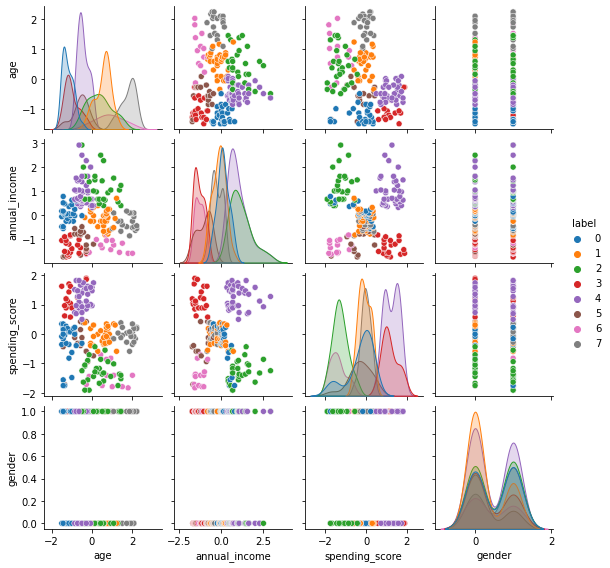


Amount of clusters: 9


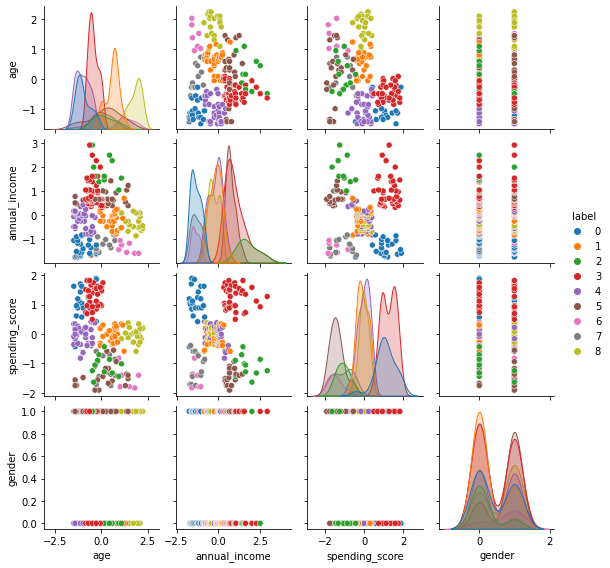


Amount of clusters: 10


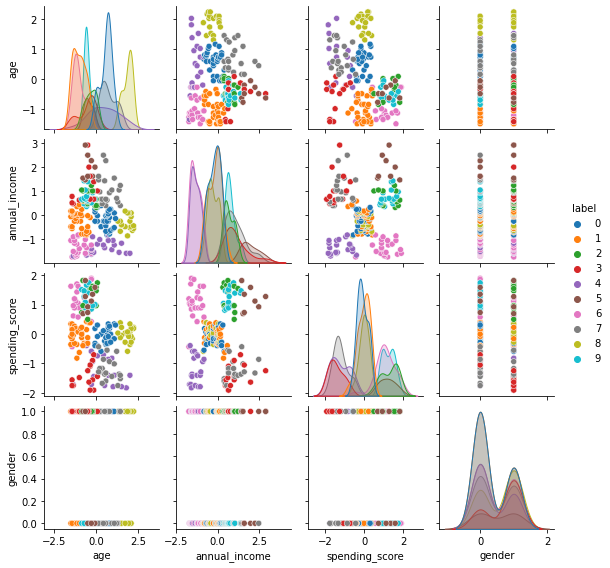


Amount of clusters: 11


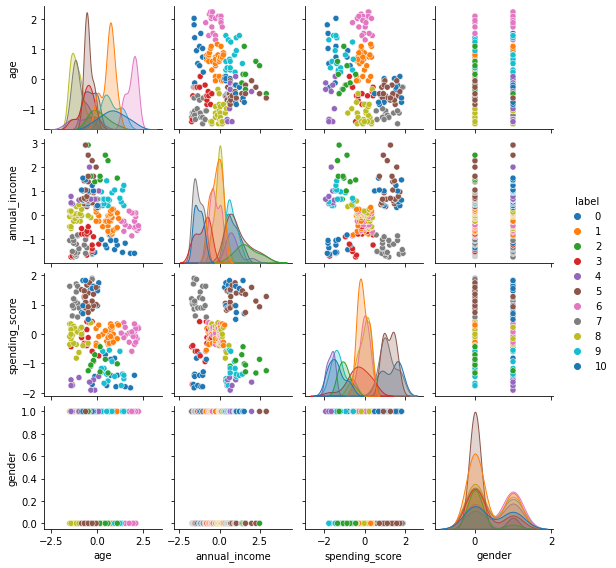


Amount of clusters: 12


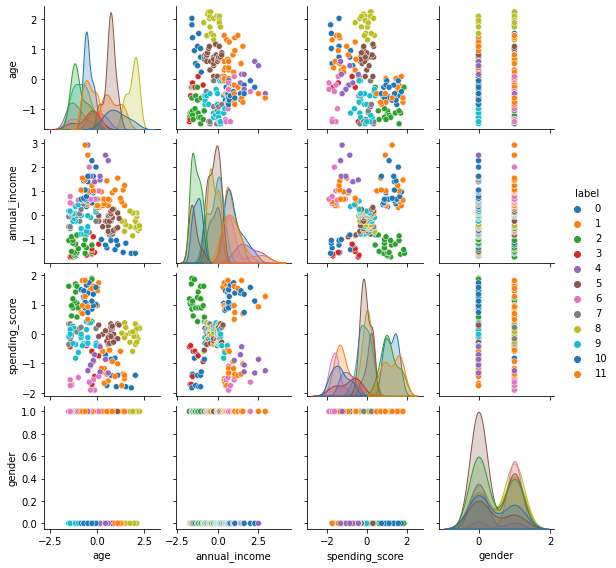


Amount of clusters: 13


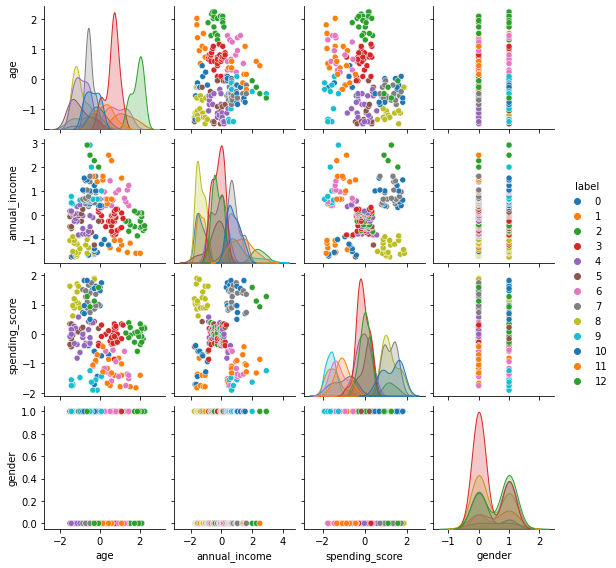


Amount of clusters: 14


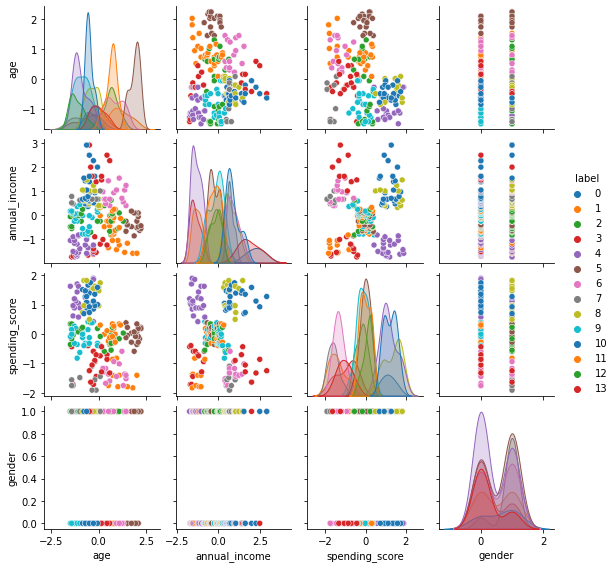


Amount of clusters: 15


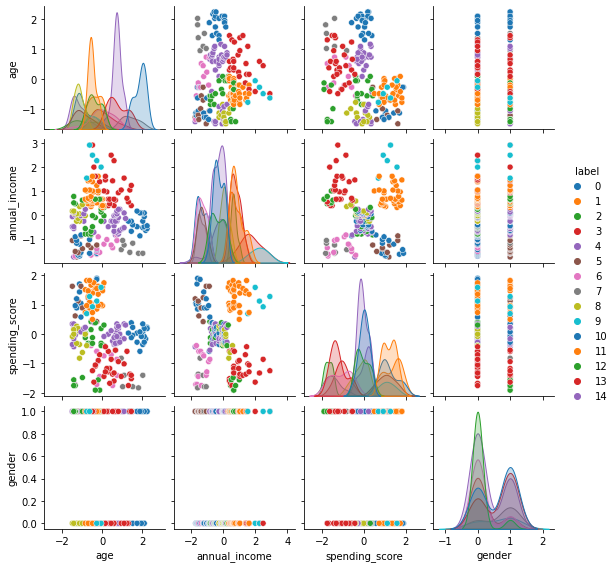


Amount of clusters: 16


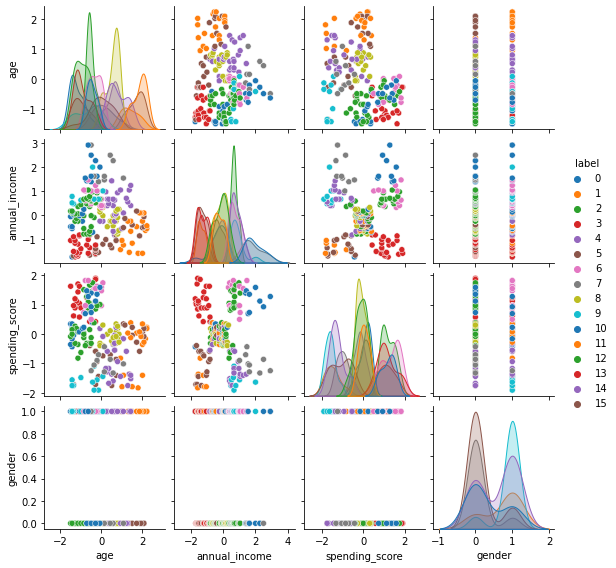


Amount of clusters: 17


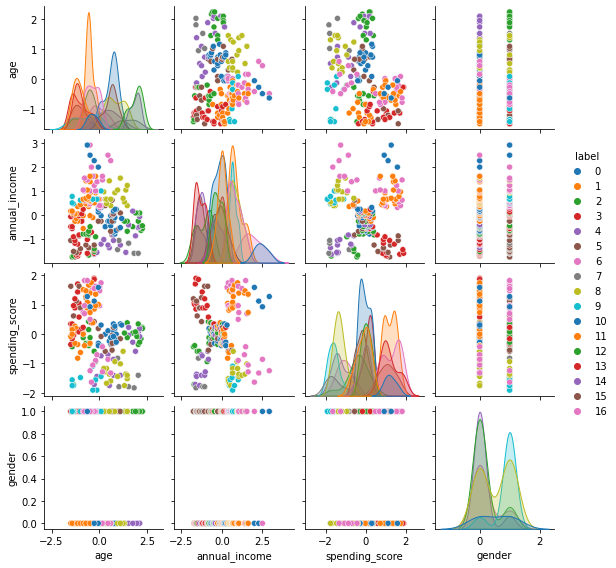


Amount of clusters: 18


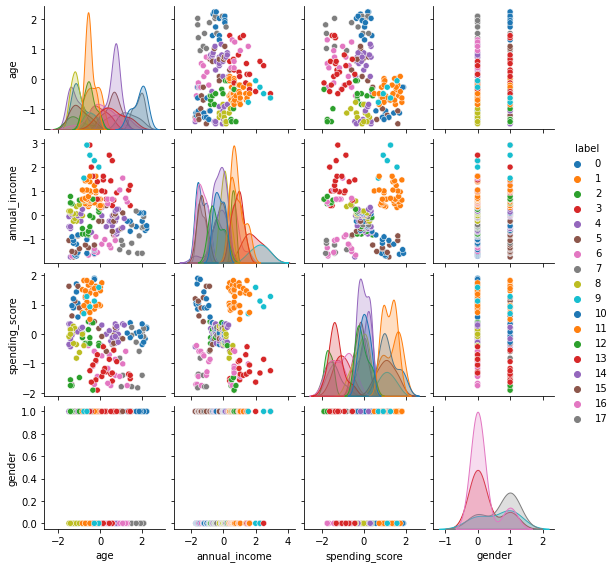


Amount of clusters: 19


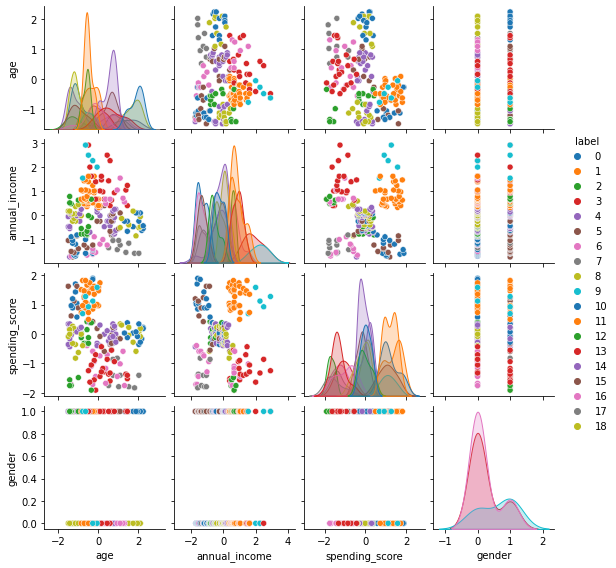


Amount of clusters: 20


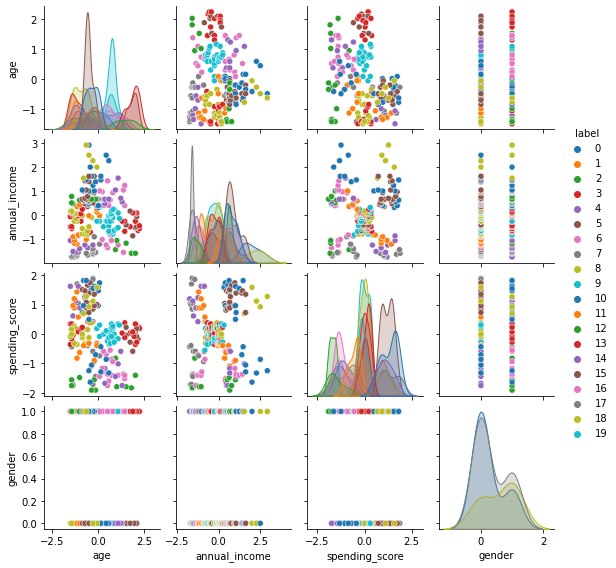

In [14]:
data_kmean = data_standardized.copy()
features = data_standardized.columns[:-1]
squares = []

for i in range(2, 20 + 1):
  print(f'Amount of clusters: {i}')
  km = KMeans(n_clusters = i, random_state = 42)
  km.fit(data_standardized.values)
  data_kmean['label'] = km.predict(data_standardized.values)
  squares.append(km.inertia_)
  seaborn.pairplot(data_kmean, hue = 'label', palette = 'tab10', height = 2, aspect = 1)     
  plt.show()
  print('')

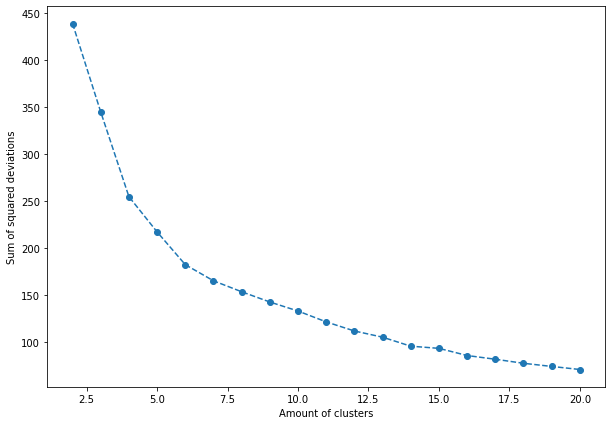

In [15]:
plt.figure(figsize = (10, 7))
plt.ylabel('Sum of squared deviations')
plt.xlabel('Amount of clusters')
plt.plot(range(2, 2 + len(squares)), squares, 'o--')

#Silhouette method

In [16]:
def calculate_silhouettes(df: pd.DataFrame):
  df['silh_c'] = silhouette_samples(df.drop(columns = ['label']), df['label'])
  n_clusters = len(np.unique(df['label']))
  silh_c = []
  average = silhouette_score(df.drop(columns = ['label']), df['label'])
  for i in range(n_clusters):
    df_i = df[df['label'] == i]
    silh_c += [df_i['silh_c'].values.mean()]
  return n_clusters, silh_c, average

def plot_silhouettes(n_clusters, silh_c, average):
  plt.barh(range(1, n_clusters + 1), silh_c)
  plt.vlines(average, 0.5, n_clusters + 0.5, linestyles = '--')
  plt.show()

Amount of clusters: 2
Avg. value: 0.30256


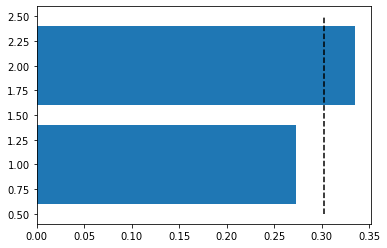


Amount of clusters: 3
Avg. value: 0.31453


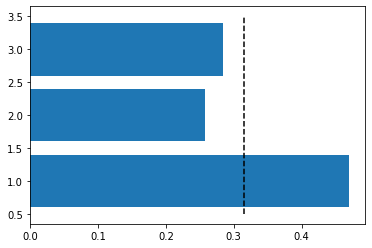


Amount of clusters: 4
Avg. value: 0.34905


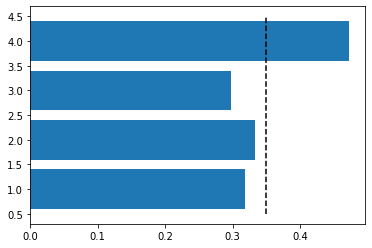


Amount of clusters: 5
Avg. value: 0.34959


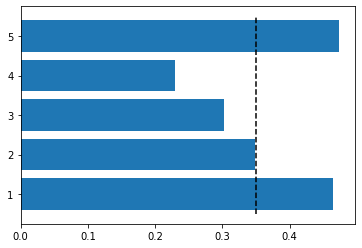


Amount of clusters: 6
Avg. value: 0.35437


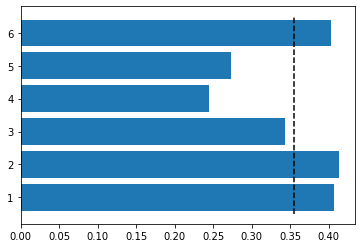


Amount of clusters: 7
Avg. value: 0.33162


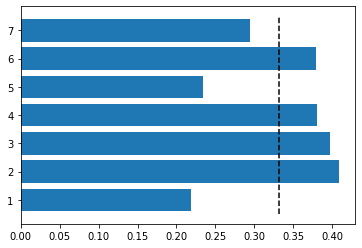


Amount of clusters: 8
Avg. value: 0.33375


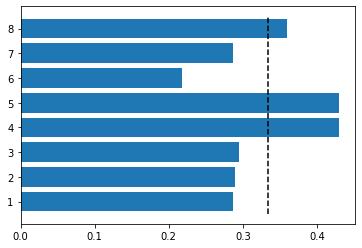


Amount of clusters: 9
Avg. value: 0.32846


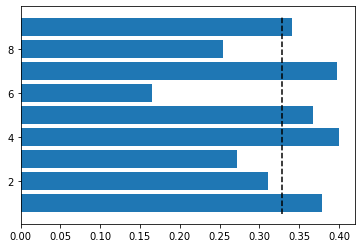


Amount of clusters: 10
Avg. value: 0.31201


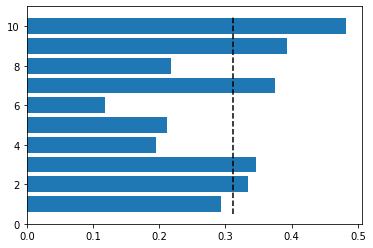


Amount of clusters: 11
Avg. value: 0.31670


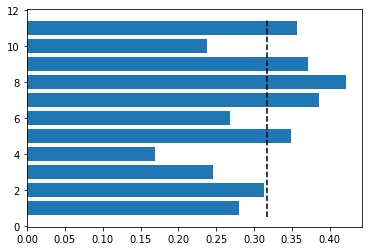


Amount of clusters: 12
Avg. value: 0.32131


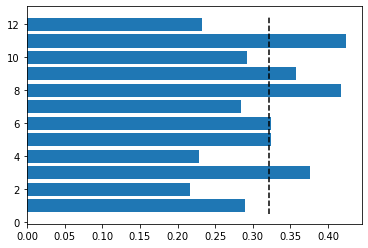


Amount of clusters: 13
Avg. value: 0.32614


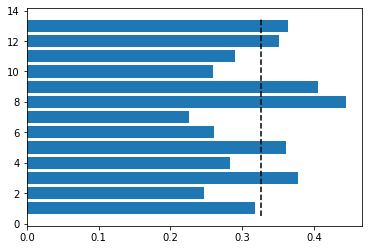


Amount of clusters: 14
Avg. value: 0.33721


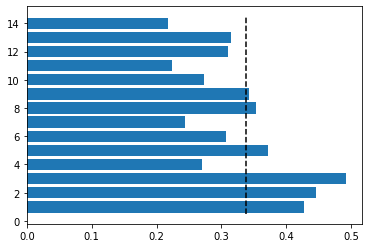


Amount of clusters: 15
Avg. value: 0.32054


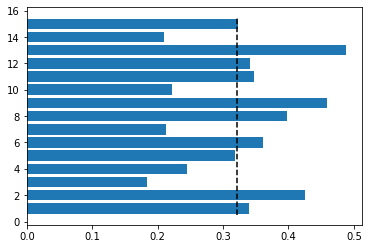


Amount of clusters: 16
Avg. value: 0.33724


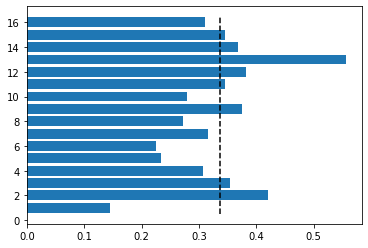


Amount of clusters: 17
Avg. value: 0.33860


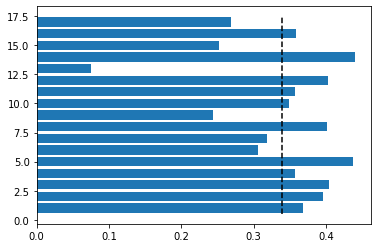


Amount of clusters: 18
Avg. value: 0.33532


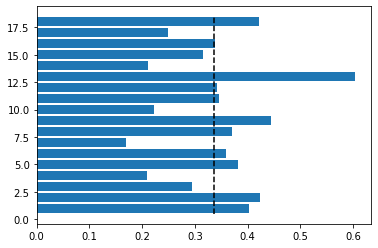


Amount of clusters: 19
Avg. value: 0.33138


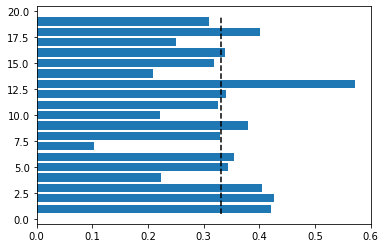


Amount of clusters: 20
Avg. value: 0.33334


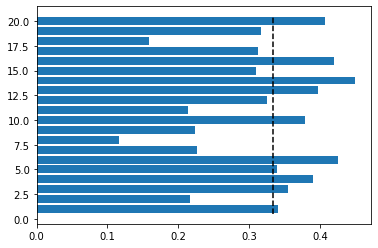



Max. silhouette coefficient: 0.3543661906855342 (amount of clusters: 6)


In [17]:
data_kmean = data_standardized.copy()
averages = []

for i in range(2, 20 + 1):
  print(f'Amount of clusters: {i}')
  km = KMeans(n_clusters = i, random_state = 42)
  km.fit(data_standardized.values)
  labels = km.predict(data_standardized.values)
  data_kmean['label'] = km.predict(data_standardized.values)
  n_clusters, silh_c, average = calculate_silhouettes(data_kmean)
  averages.append((i, average))
  print(f'Avg. value: {average:.5f}')
  plot_silhouettes(n_clusters, silh_c, average)
  print('')

sorted_averages = sorted(averages, key = lambda x: x[1], reverse = True)
max = sorted_averages[0]
print('')
print(f'Max. silhouette coefficient: {max[1]} (amount of clusters: {max[0]})')

#K-Means clustering

In [20]:
def make_graphs(df):
  seaborn.pairplot(df, hue = 'class', palette = 'tab10')
  plt.show()
  print('')

  seaborn.countplot(df['class'], label = 'Count')
  plt.show()
  print('')

  seaborn.barplot(x = 'class', y = 'spending_score', hue = 'gender', data = df)
  plt.show()
  print('')

  seaborn.barplot(x = 'class', y = 'annual_income', hue = 'gender', data = df)
  plt.show()
  print('')

  seaborn.barplot(x = 'class', y = 'age', hue = 'gender', data = df)
  plt.show()
  print('')

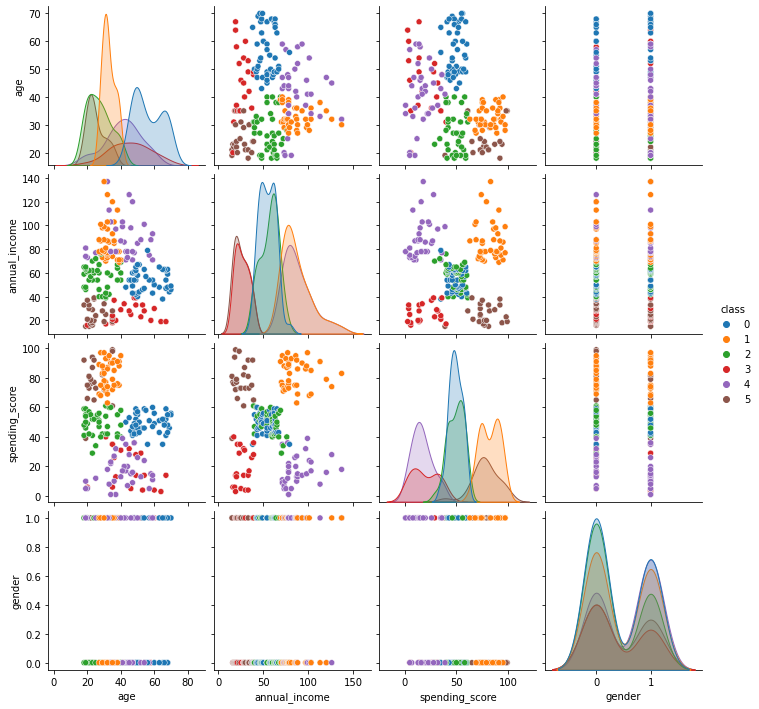

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



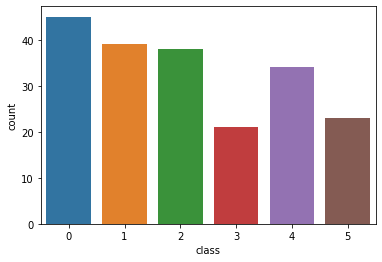

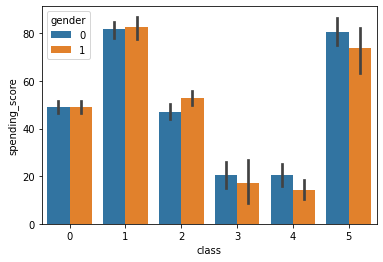

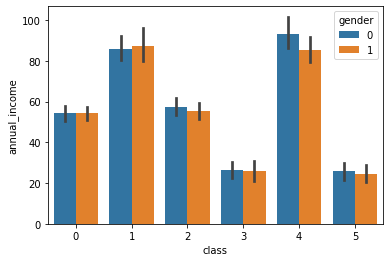

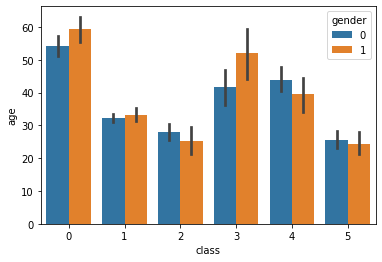

In [19]:
km = KMeans(n_clusters = 6, random_state = 42)
km.fit(data_standardized.values)
prediction = km.predict(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = prediction

make_graphs(data_classified)

6 classes of customers:
* Class 0 - 30-35 years, high income, high spending rate
* Class 1 - 55-60 years, average income, average spending rate
* Class 2 - 25-30 years, low income, high spending rate
* Class 3 - 40-45 years, high income, low spending rate
* Class 4 - 25-30 years, average income, average spending rate
* Class 5 - 45-50 years, low income, low spending rate

#Spectral clustering

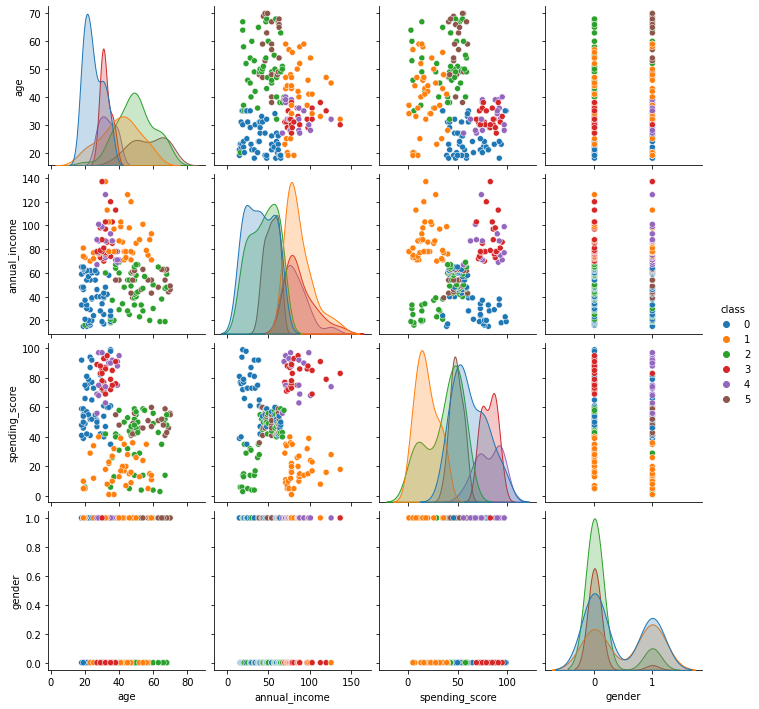

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



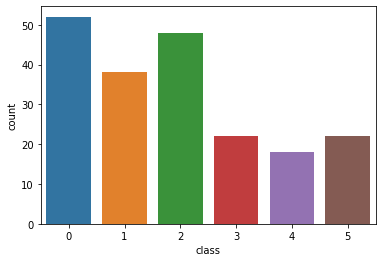

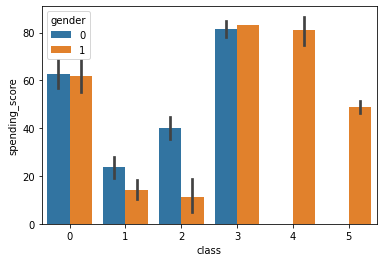

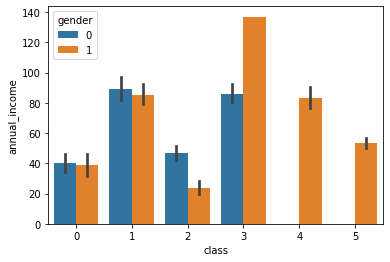

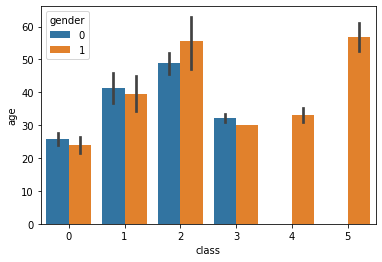

In [23]:
method = SpectralClustering(n_clusters = 6, affinity = 'nearest_neighbors', random_state = 42)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

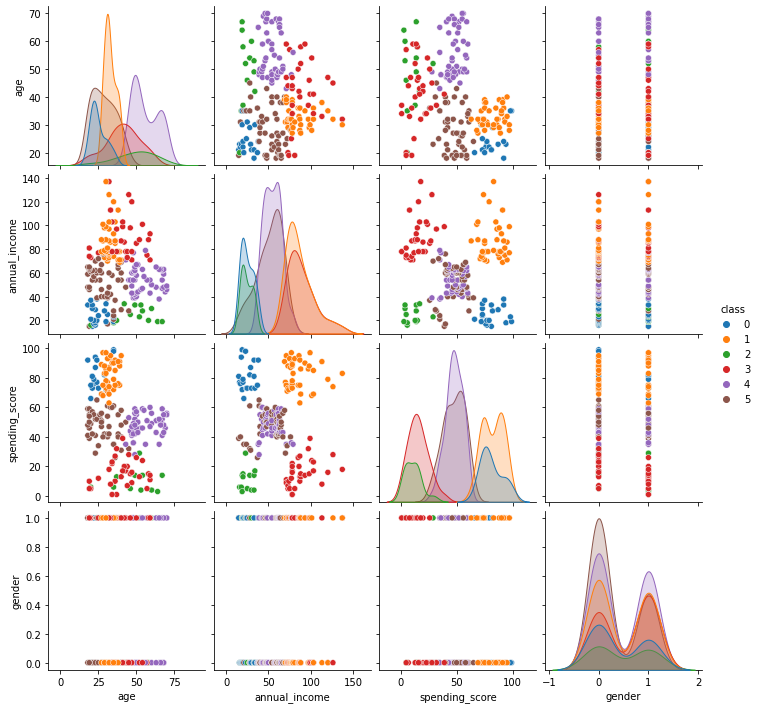

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



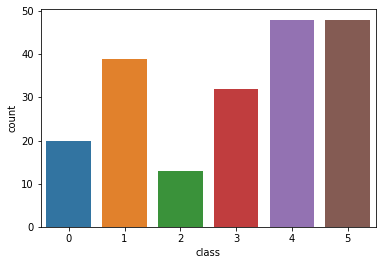

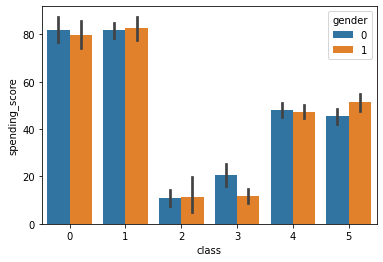

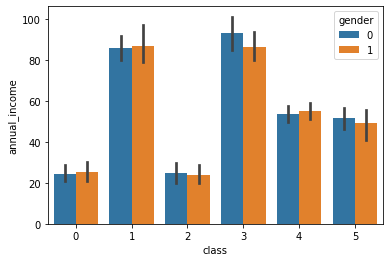

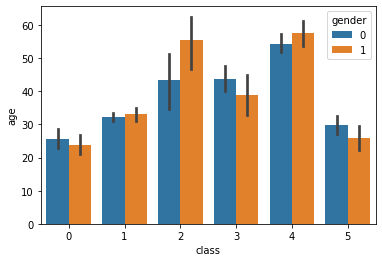

In [24]:
method = SpectralClustering(n_clusters = 6, affinity = 'rbf', random_state = 42)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#DBSCAN

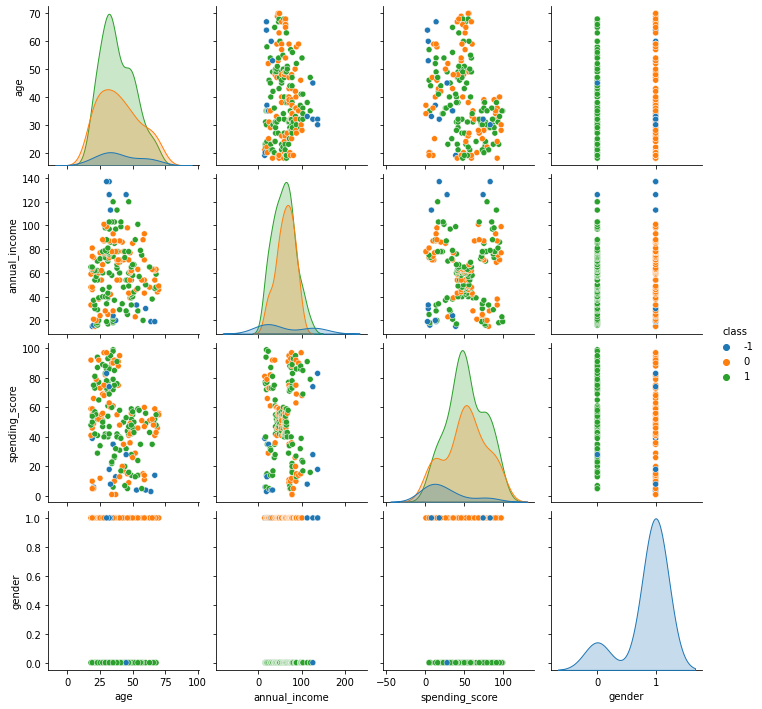

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



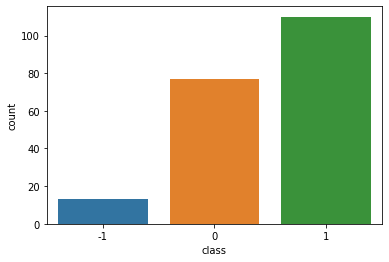

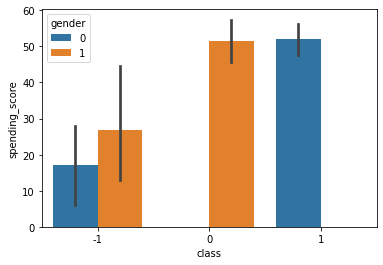

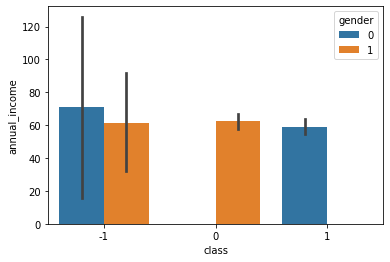

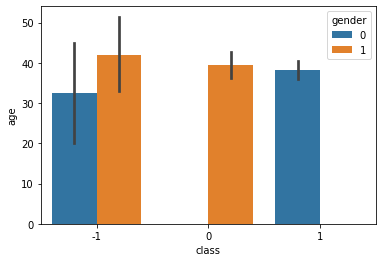

In [25]:
method = DBSCAN(eps = 1, min_samples = 5, algorithm = 'auto')
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

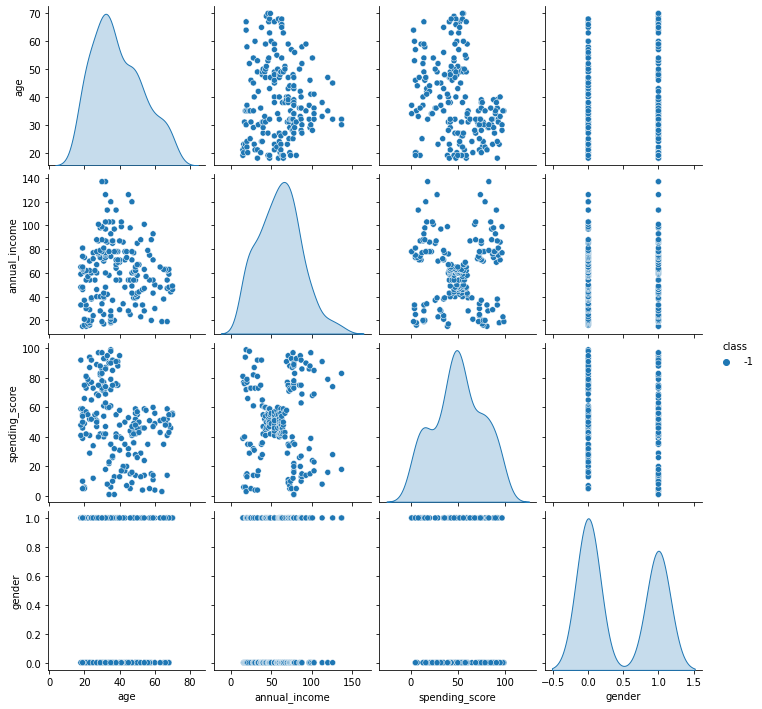

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



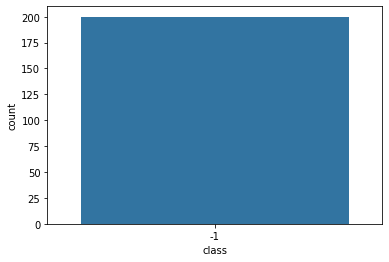

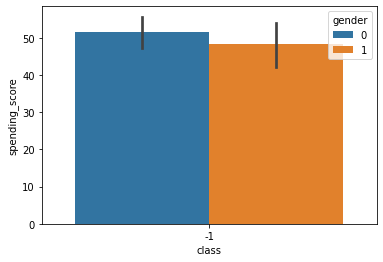

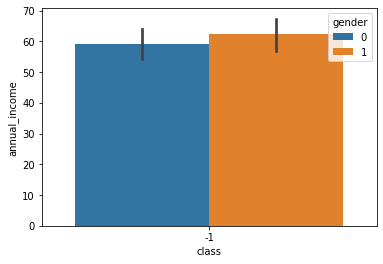

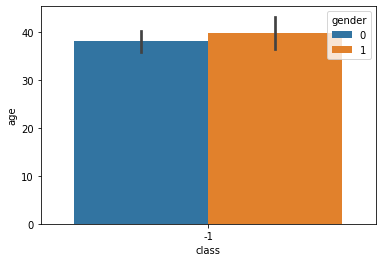

In [26]:
method = DBSCAN(eps = 0.1, min_samples = 10, algorithm = 'kd_tree')
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#Affinity Propagation

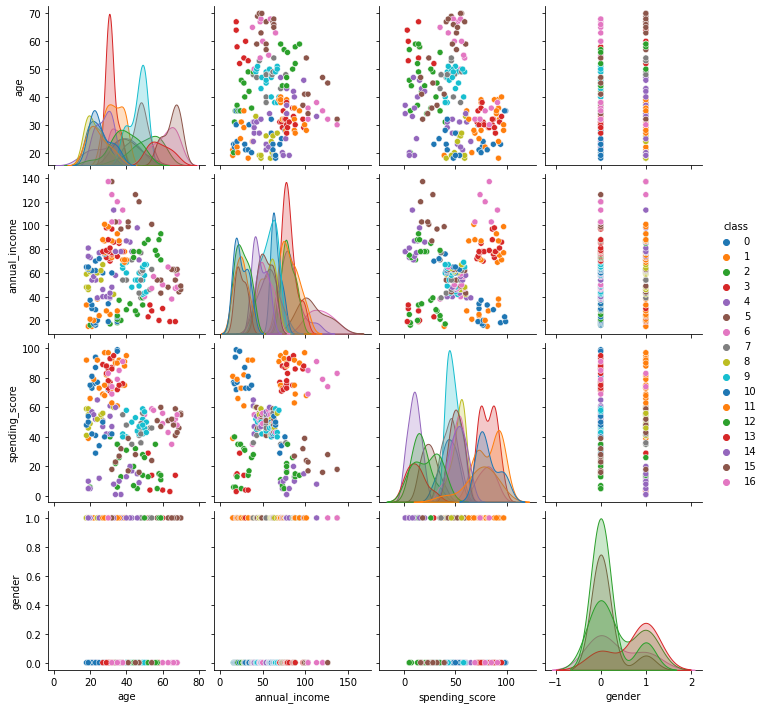

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



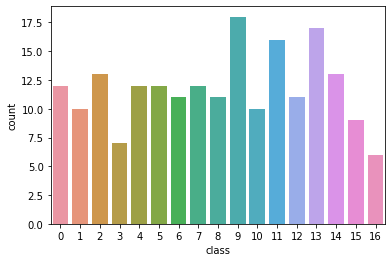

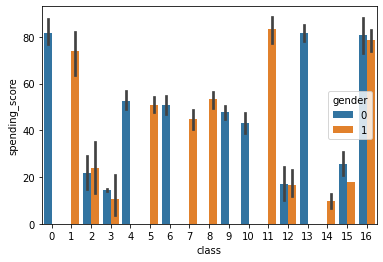

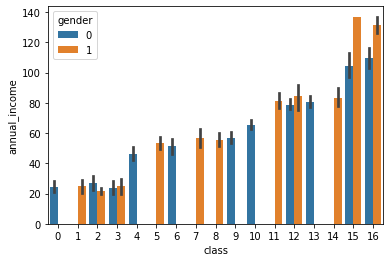

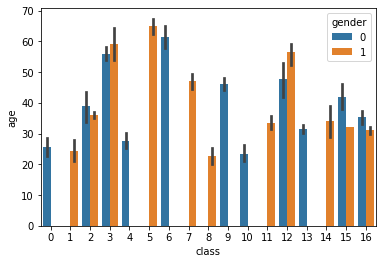

In [27]:
#damping - [0.5, 1.0)
method = AffinityPropagation(damping = 0.95, random_state = 42)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#Mean Shift

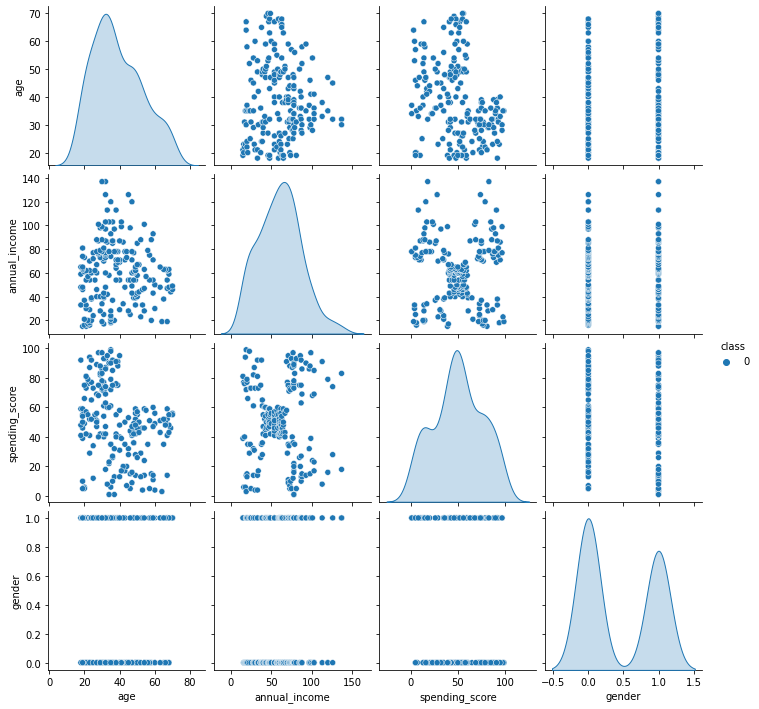

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



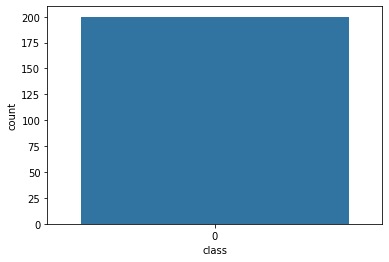

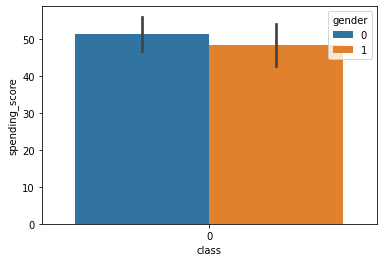

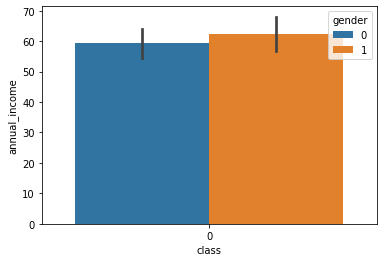

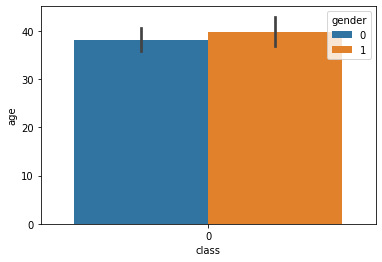

In [37]:
method = MeanShift()
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

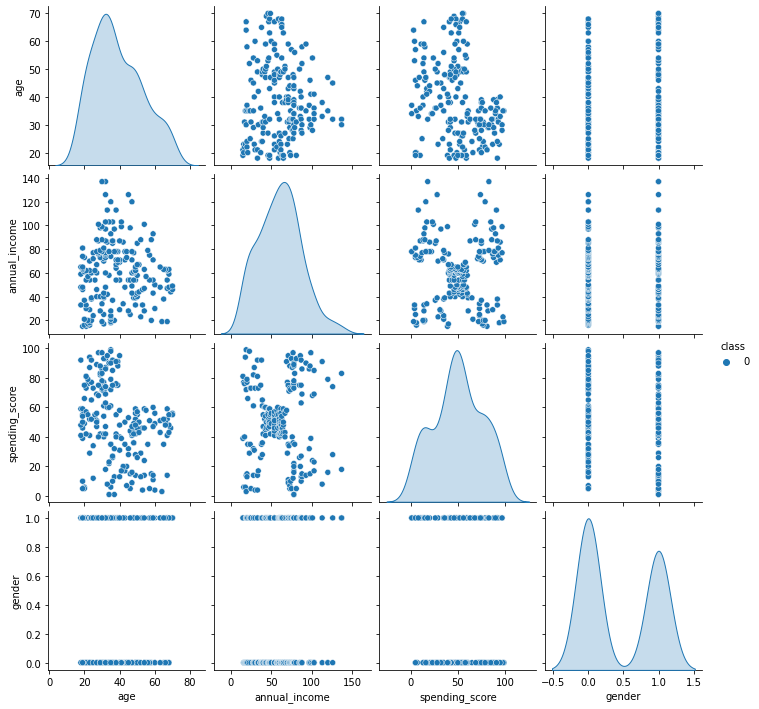

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



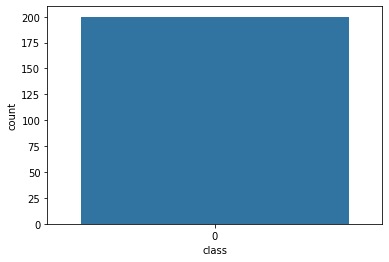

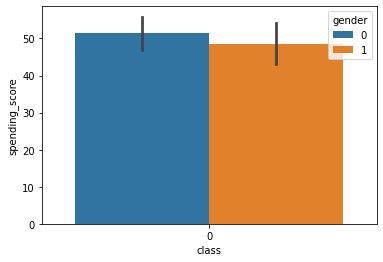

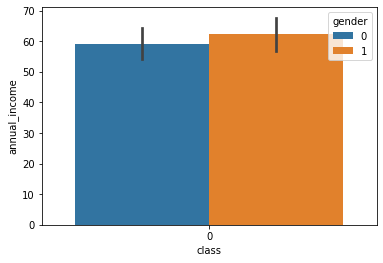

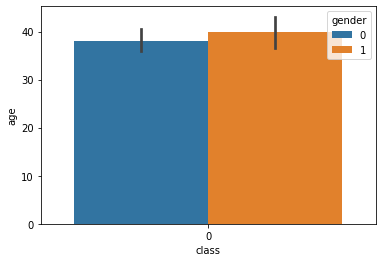

In [39]:
method = MeanShift(bandwidth = 2)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#Agglomerative clustering (ward hierarchical clustering)

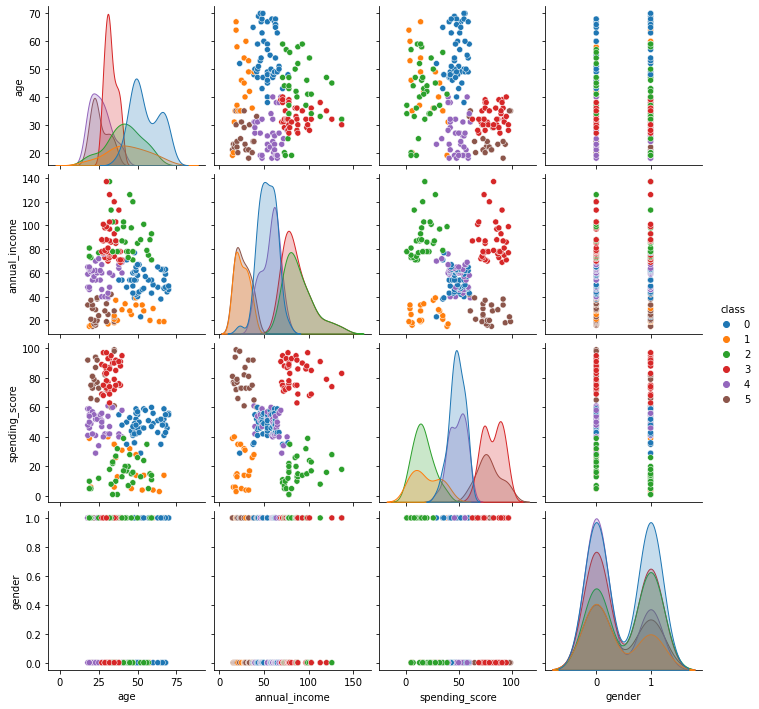

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



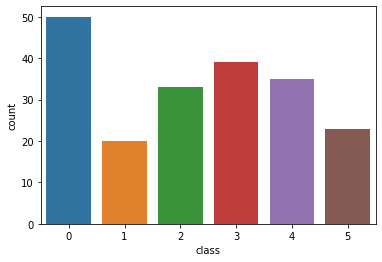

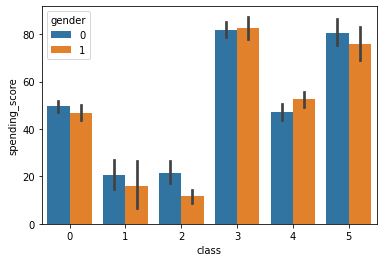

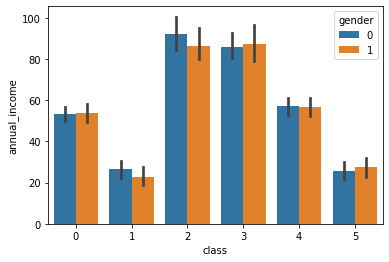

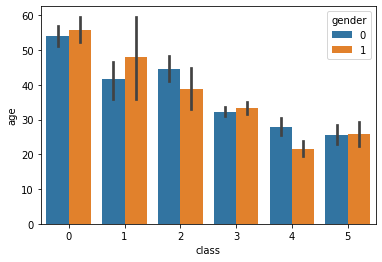

In [40]:
method = AgglomerativeClustering(n_clusters = 6)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#Birch method

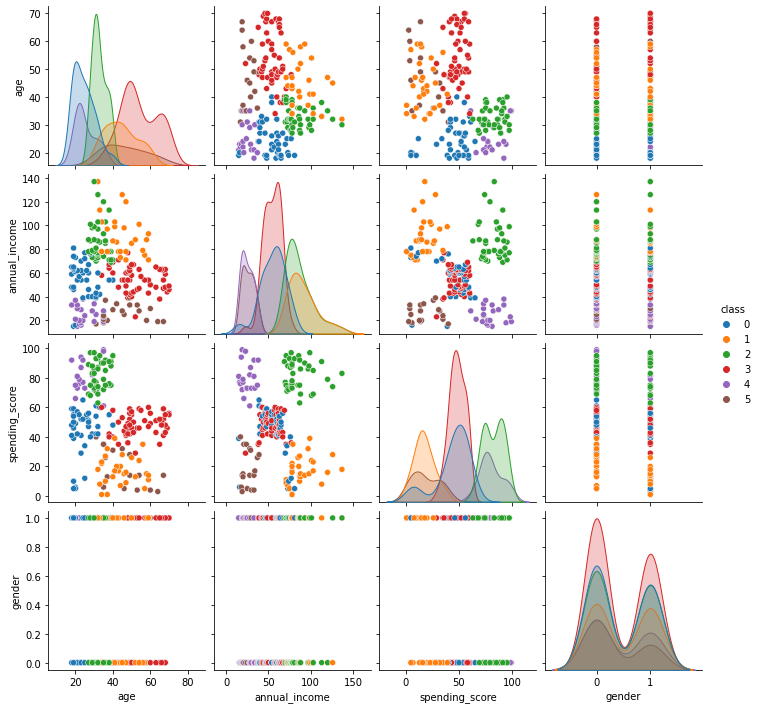

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



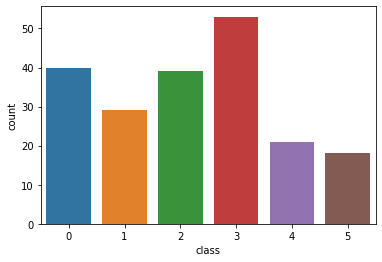

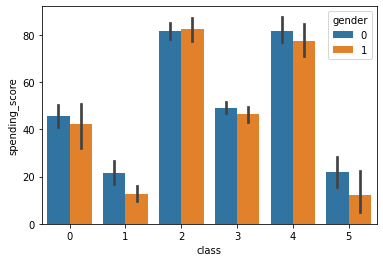

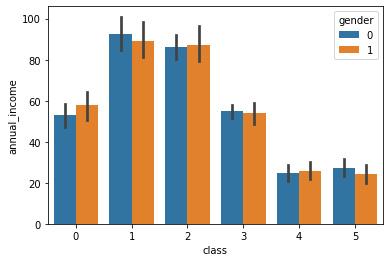

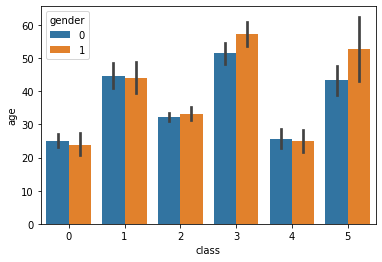

In [41]:
method = Birch(n_clusters = 6)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#OPTICS

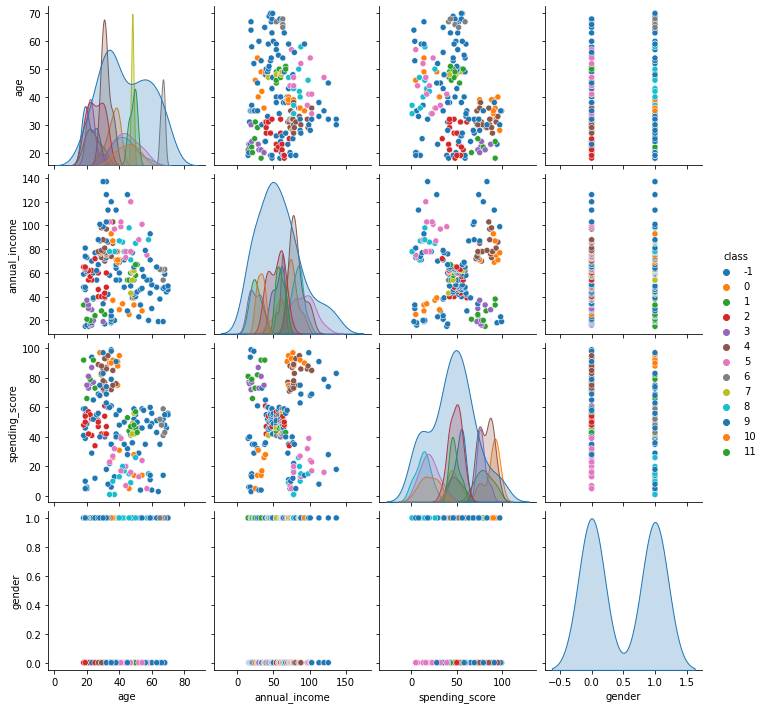

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



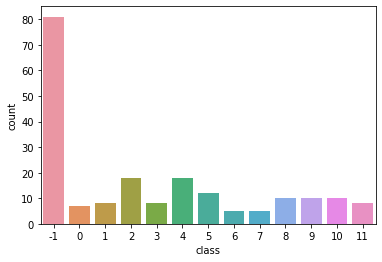

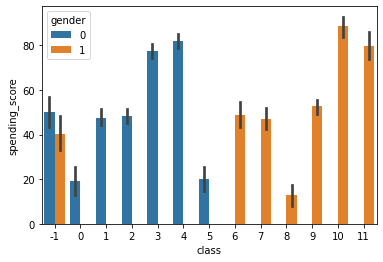

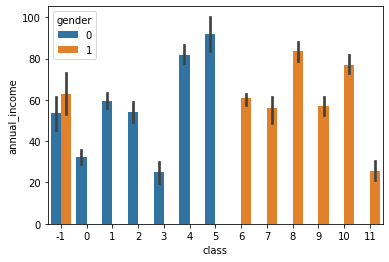

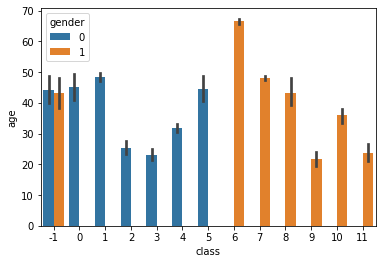

In [42]:
method = OPTICS(min_samples = 5)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

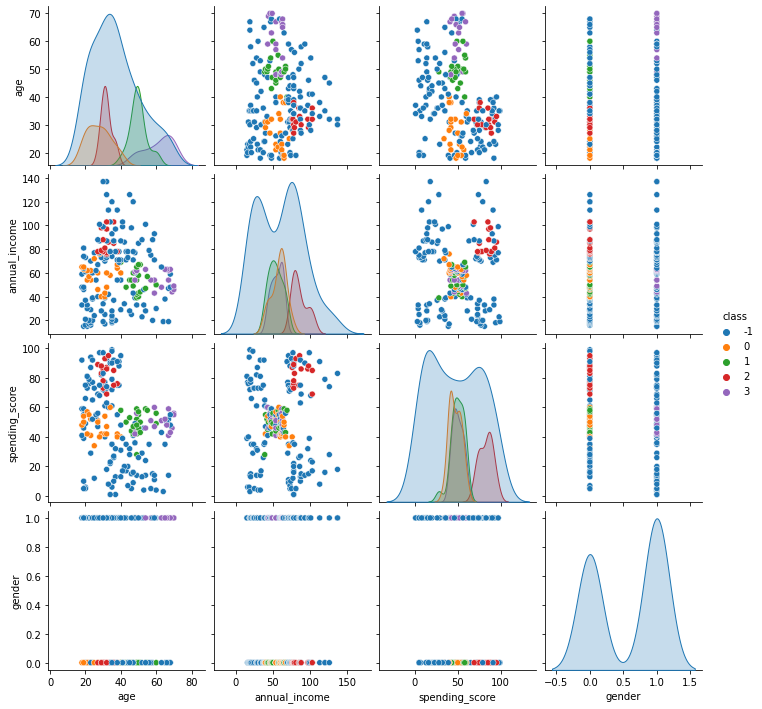

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



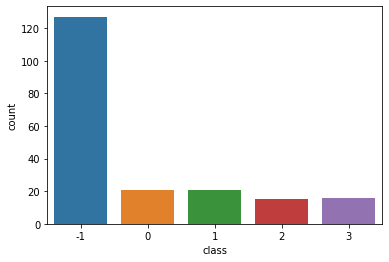

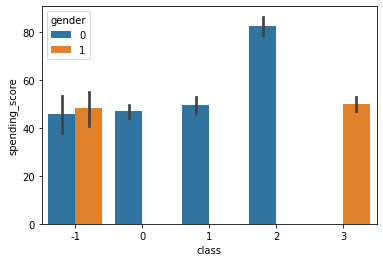

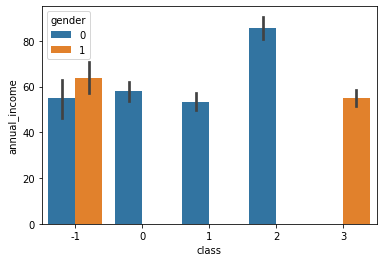

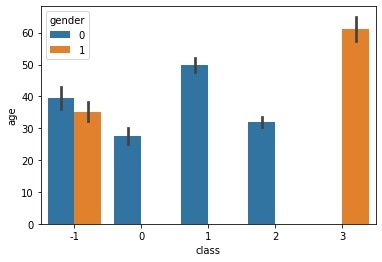

In [44]:
method = OPTICS(min_samples = 15)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

#Mini batch K-Means clustering

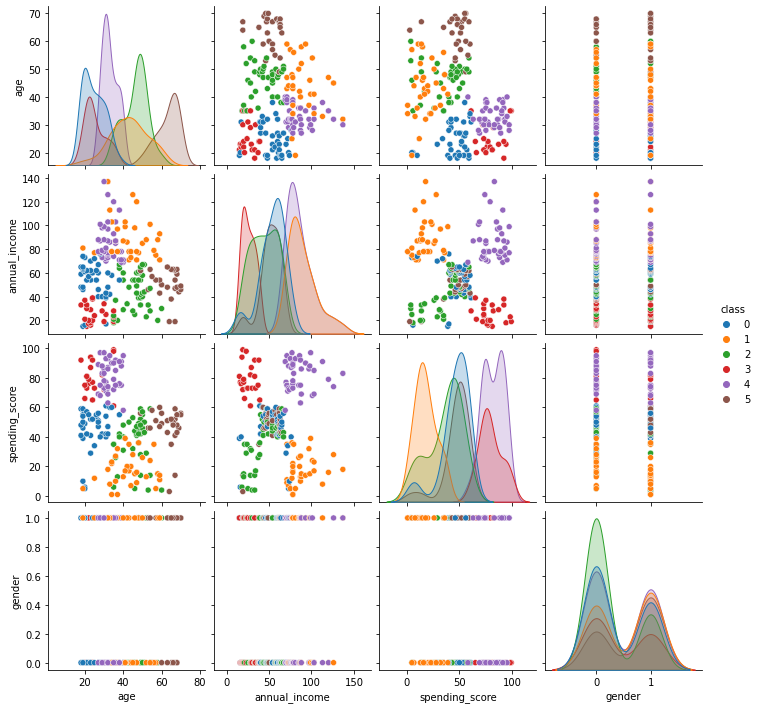

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



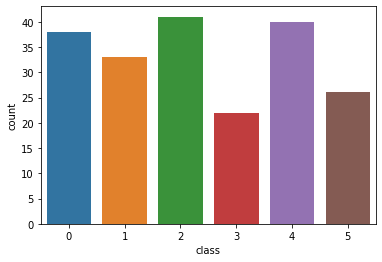

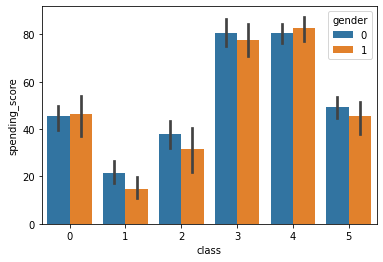

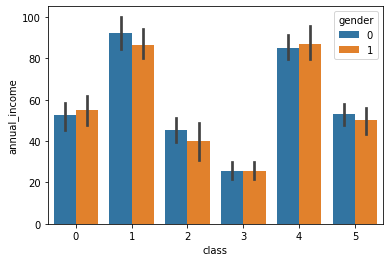

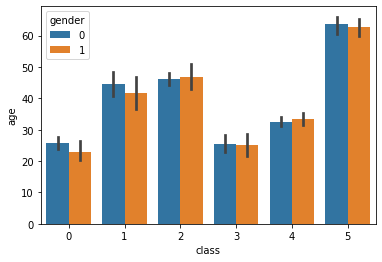

In [45]:
method = MiniBatchKMeans(n_clusters = 6, random_state = 42, batch_size = 32, reassignment_ratio = 0.05)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)

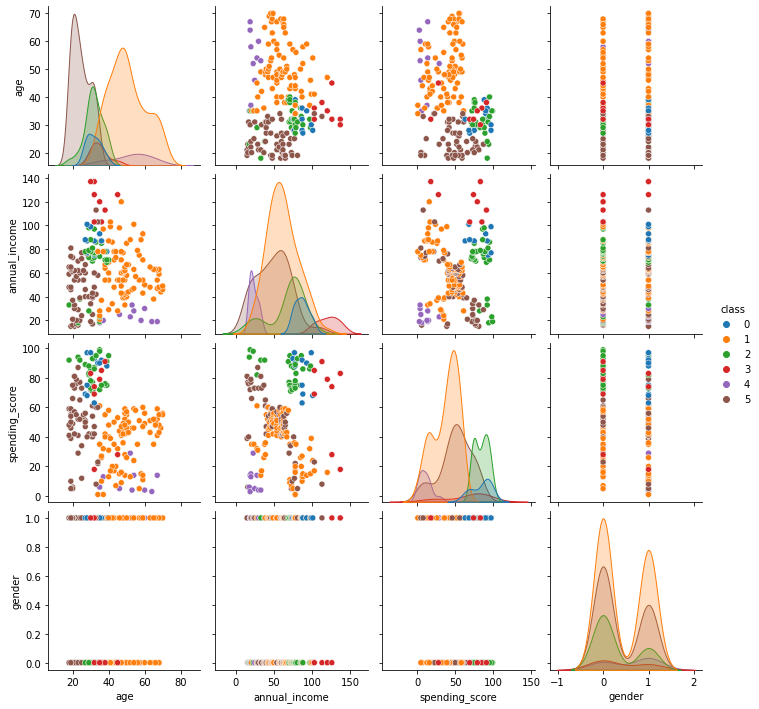

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



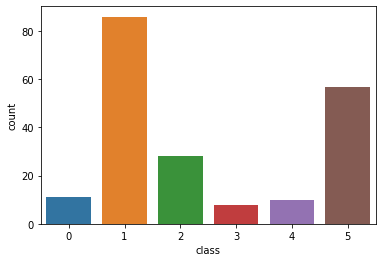

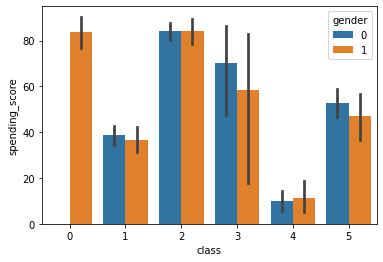

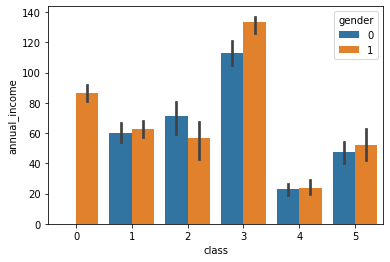

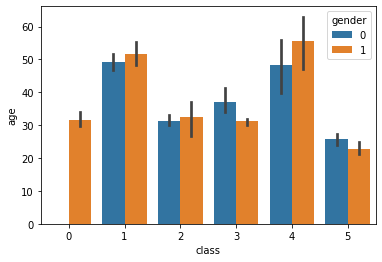

In [46]:
method = MiniBatchKMeans(n_clusters = 6, random_state = 42, batch_size = 32, reassignment_ratio = 0.95)
clustering = method.fit(data_standardized.values)

data_classified = data.copy()
data_classified['class'] = clustering.labels_

make_graphs(data_classified)